In [27]:
import numpy as np
import matplotlib.pyplot as plt

import py.continuum1d as continuum1d

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
params=None
c1d = continuum1d.continuum1d()

1d Model initialised.


In [84]:
ee = 4.0
ii = 2.75
params={'I_e': ee, 'I_i': ii, 'n': 350, 'length': 50, 'end_t': 1200, 'sigma_i': 3} 
ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)
print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

fixed points [[0.18162866 0.28428421]] 
with (mass) stability [0]


In [85]:
fp = fps[0]

In [90]:
ue, ui = c1d.run(params, itype='inte_approxi')#, fp=fp)

In [86]:
ueff, uiff = c1d.run(params, itype='inte_fft')#, fp=fp)

Text(0.5, 1.0, 'integration by fft')

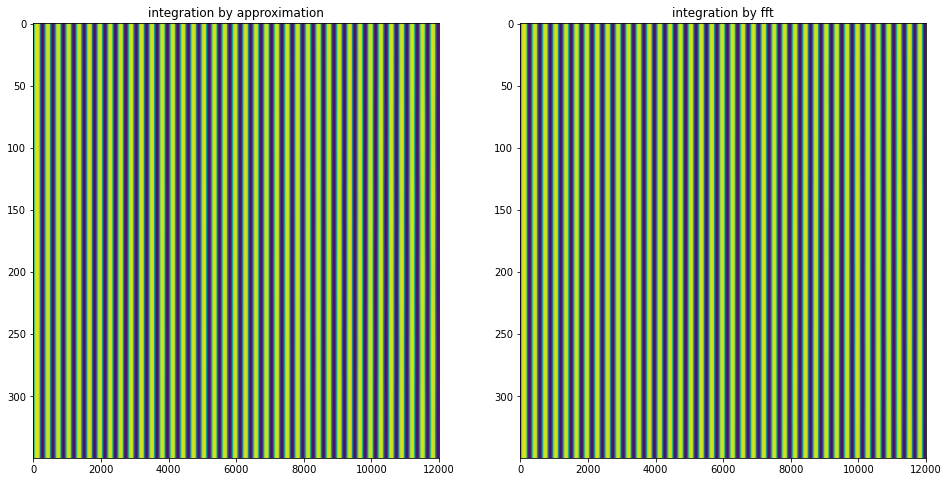

In [91]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

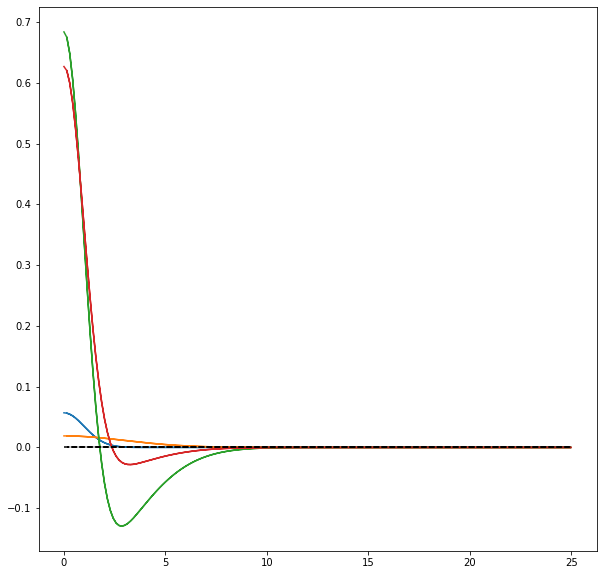

In [89]:
plt.figure(figsize=(10,10))
together_e = ps.w_ee*ps.ke - ps.w_ei*ps.ki
together_i = ps.w_ie*ps.ke - ps.w_ii*ps.ki
zero_line = np.zeros(ps.n)
plt.plot(ps.x, ps.ke, ps.x, ps.ki)
plt.plot(ps.x, together_e)
plt.plot(ps.x, together_i)
plt.plot(ps.x, zero_line, linestyle='dashed', c='black')

# Same setting, different length

In [68]:
params1 = {'I_e': 5.2 , 'I_i': 3.7, 'n': 350, 'length': 20, 'end_t': 500} 
ps1 = setParams(params1)
fps1 = computeFPs(ps1)
stab1 = checkFixPtsStability(fps1, ps1)
print('fixed points %s ' %str(fps1))
print('with (mass) stability %s'  %str(stab1))

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499
Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499
fixed points [array([0.15193985, 0.36254204]), array([0.83774719, 0.99686619]), array([0.9798589 , 0.99942469])] 
with (mass) stability [1, 0, 1]


In [69]:
fp1 = fps1[0]

In [70]:
ue1, ui1 = c1d.run(params1, itype='inte_approxi', fp=fp1)

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499


In [71]:
ueff1, uiff1 = c1d.run(params1, itype='inte_fft', fp=fp1)

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499


Text(0.5, 1.0, 'integration by fft')

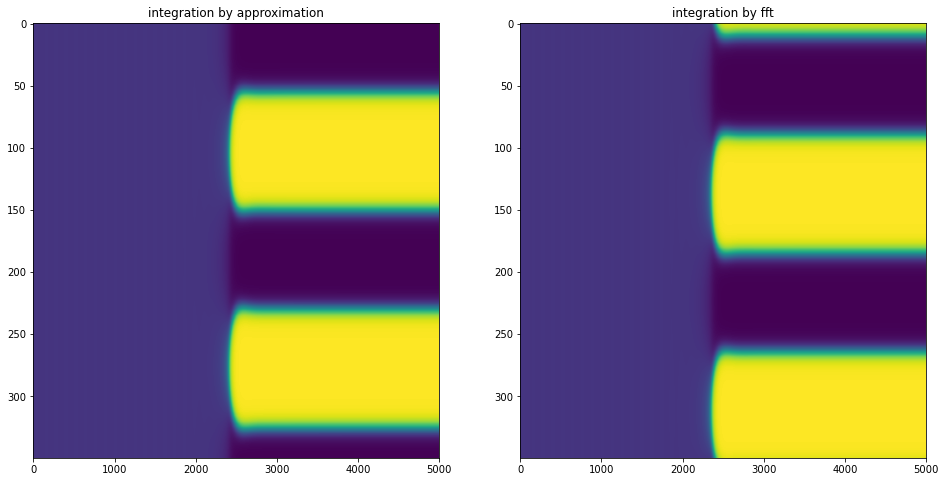

In [72]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue1.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff1.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

In [14]:
ue1[-10][0:5], ueff1[-10][0:5]

(array([0.95772056, 0.96679761, 0.97374202, 0.97906705, 0.98316525]),
 array([0.99875221, 0.99875361, 0.99875242, 0.99874861, 0.99874208]))

# Other setting (unstable)

In [15]:
params2 = {'I_e': 2.5, 'I_i': 1.6, 'n': 162, 'length': 10} 
ps2 = setParams(params2)
fps2 = computeFPs(ps2)
stab2 = checkFixPtsStability(fps2, ps2)
print('fixed points %s ' %str(fps2))
print('with (mass) stability %s'  %str(stab2))

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608
Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608
fixed points [array([0.19052787, 0.16625248])] 
with (mass) stability [0]


In [16]:
fp2 = fps2[0]

In [17]:
ue2, ui2 = c1d.run(params2, itype='inte_approxi')#, fp=fp2)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608


In [18]:
ueff2, uiff2 = c1d.run(params2, itype='inte_fft')#, fp=fp2)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608


Text(0.5, 1.0, 'integration by fft')

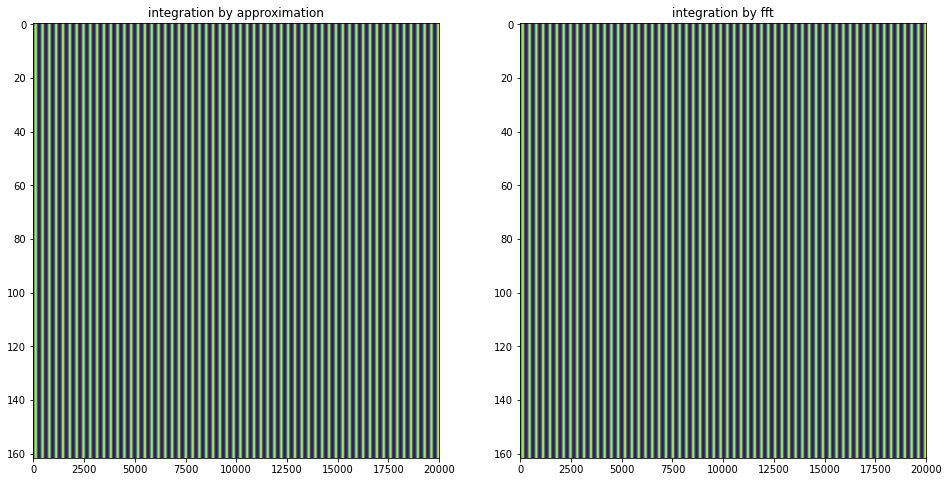

In [19]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue2.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff2.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

In [20]:
ue2

array([[0.00165198, 0.00351664, 0.00557534, ..., 0.00930578, 0.00682943,
        0.00304218],
       [0.00471953, 0.00650946, 0.00848557, ..., 0.01206705, 0.00968989,
        0.00605419],
       [0.00777636, 0.00949454, 0.01139136, ..., 0.01482983, 0.0125479 ,
        0.00905768],
       ...,
       [0.90915046, 0.90915046, 0.90915046, ..., 0.90915046, 0.90915046,
        0.90915046],
       [0.90681107, 0.90681107, 0.90681107, ..., 0.90681107, 0.90681107,
        0.90681107],
       [0.90430707, 0.90430707, 0.90430707, ..., 0.90430707, 0.90430707,
        0.90430707]])

# Harris PhD Setting (as close as possible at least)

In [115]:
params_h={'tau_e': 1, 'tau_i': 0.1,
        'w_ee': 1, 'w_ei': 1.5, 'w_ie': 1, 'w_ii': 0.25,
        'sigma_e': 1, 'sigma_i': 3, 'kernel': 'gaussian', 
        'mu_e': 0, 'mu_i': 0, 'beta_e': 50, 'beta_i': 50,
        'I_e': -0.1, 'I_i': -0.4,
        'dt': 0.1, 'start_t': 0, 'end_t': 500, 
        'n': 812, 'length': 60}

In [116]:
ps_h = setParams(params_h)
fps_h = computeFPs(ps_h)
stab_h = checkFixPtsStability(fps_h, ps)
print('fixed points %s ' %str(fps_h))
print('with (mass) stability %s'  %str(stab_h))

fixed points [[1.23241817e-02 3.81703853e-09]
 [3.14558007e-02 9.93427119e-09]
 [4.31367027e-01 2.24595030e-01]] 
with (mass) stability [1, 0, 1]


In [117]:
fp_h = fps_h[2]

In [118]:
ue_harris, ui_harris = c1d.run(params_h, itype='inte_approxi', fp=fp_h)

In [119]:
ueff_harris, uiff_harris = c1d.run(params_h, itype='inte_fft', fp=fp_h)

Text(0.5, 1.0, 'harris: integration by fft')

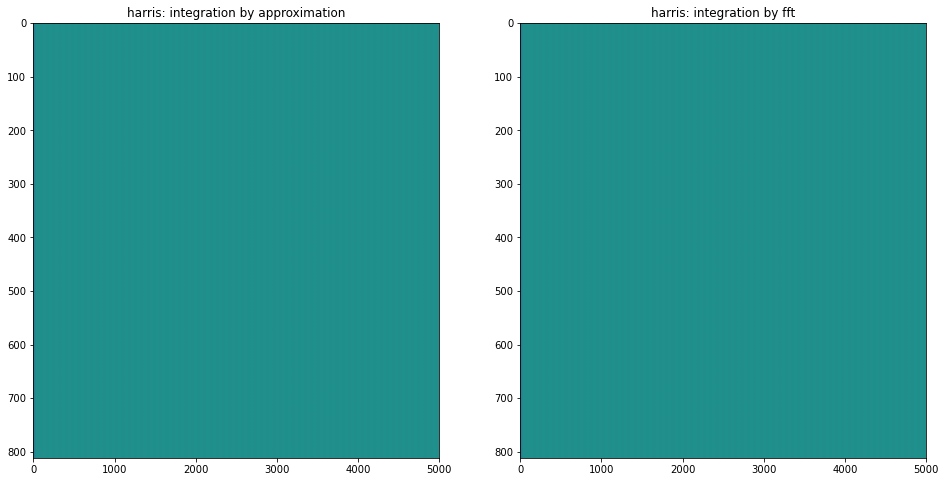

In [121]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue_harris.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff_harris.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='harris: integration by approximation')
ax1.set_title(label='harris: integration by fft')

In [113]:
ue_harris.T[10]

array([0.43136703, 0.43136703, 0.43136703, ..., 0.52631578, 0.47368421,
       0.52631578])